# CODSOFT Data Science Internship Taks 1 - TITANIC SURVIVAL PREDICTION
#### By Bhavya Sri Pragada

### Reading data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(10)
# survived - 1
# not survived - 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.shape

(891, 12)

## Data analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Analysing survival rate w.r.t Sex

<Axes: xlabel='Sex', ylabel='Survived'>

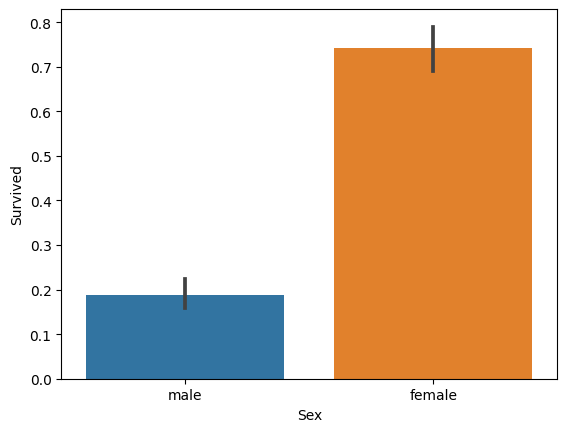

In [9]:
sns.barplot(x ='Sex', y = 'Survived', data = data)

## Analysing survival rate w.r.t Passanger class

<Axes: xlabel='Pclass', ylabel='Survived'>

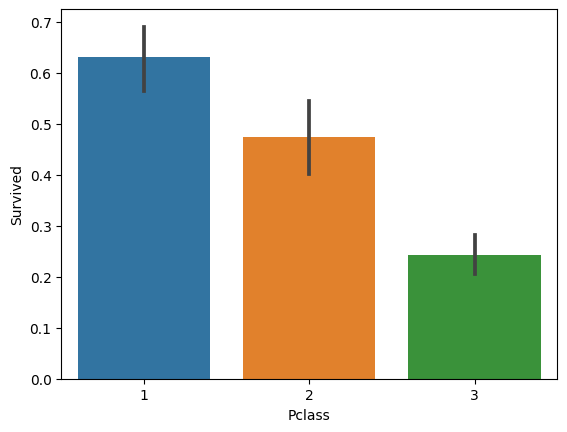

In [10]:
sns.barplot(x="Pclass", y="Survived", data = data)

In [11]:
df=data.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'],axis='columns')

### Creating input and target data

In [12]:
input_cols=df.drop(['Survived'],axis='columns')
target_cols=df['Survived']

In [13]:
input_cols.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [14]:
target_cols.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Converting the categorical value into numerical values by adding dummy values in column 'Sex'

In [15]:
sex_dummi=pd.get_dummies(input_cols.Sex)

In [16]:
input_cols=pd.concat([input_cols,sex_dummi],axis='columns')
input_cols

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,False,True
887,1,female,19.0,30.0000,True,False
888,3,female,NaN,23.4500,True,False
889,1,male,26.0,30.0000,False,True


In [18]:
input_cols.isna().sum()

Pclass      0
Sex         0
Age       177
Fare        0
female      0
male        0
dtype: int64

### Column age is having few null values, so it can be filled through average values

In [19]:
input_cols.Age=input_cols.Age.fillna(input_cols.Age.mean())

In [20]:
input_cols.drop(["Sex"],axis="columns",inplace=True)


In [21]:
input_cols.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [22]:
input_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


## Since it is a classification task, I tried to implement few classification models like Logistic regression, Decision tree, Random Forest, SVM, KNN and Gradient Boost Classifier

In [23]:
X=input_cols
Y=target_cols

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Splitting the data into training and testing sets

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Standardizing the data

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementing multiple models

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()

}

### Evaluation Metrics for each model

In [28]:
model_scores={}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
    model_scores[name]=accuracy_score(Y_test, Y_pred)
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))
    print("\n")

Logistic Regression Accuracy: 0.7989
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Decision Tree Accuracy: 0.7542
[[81 24]
 [20 54]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       105
           1       0.69      0.73      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179



Random Forest Accuracy: 0.7877
[[89 16]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy          

## After comparing all models, KNN gave good results of 82% accuracy

In [29]:
scores=list(model_scores.items())
solution=pd.DataFrame(scores,columns=['Model','Accuracy'])

<Axes: title={'center': 'Comparison of all applied ML models'}, xlabel='Model', ylabel='Accuracy'>

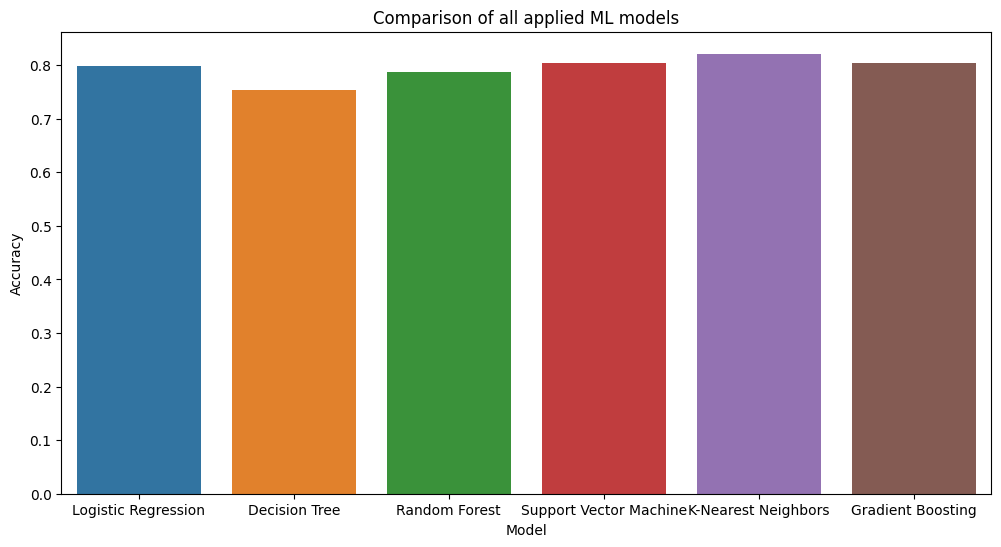

In [30]:
plt.figure(figsize=(12,6))
plt.title("Comparison of all applied ML models")
sns.barplot(x='Model',y='Accuracy',data=solution)